# Generating Synthetic data for 100 trials

This file goes over the process of generating a synthetic trial, your job is to replicate this process 100 times and store the results in json format on a text file for later processing.  Read the comments to get an idea about the missing code.



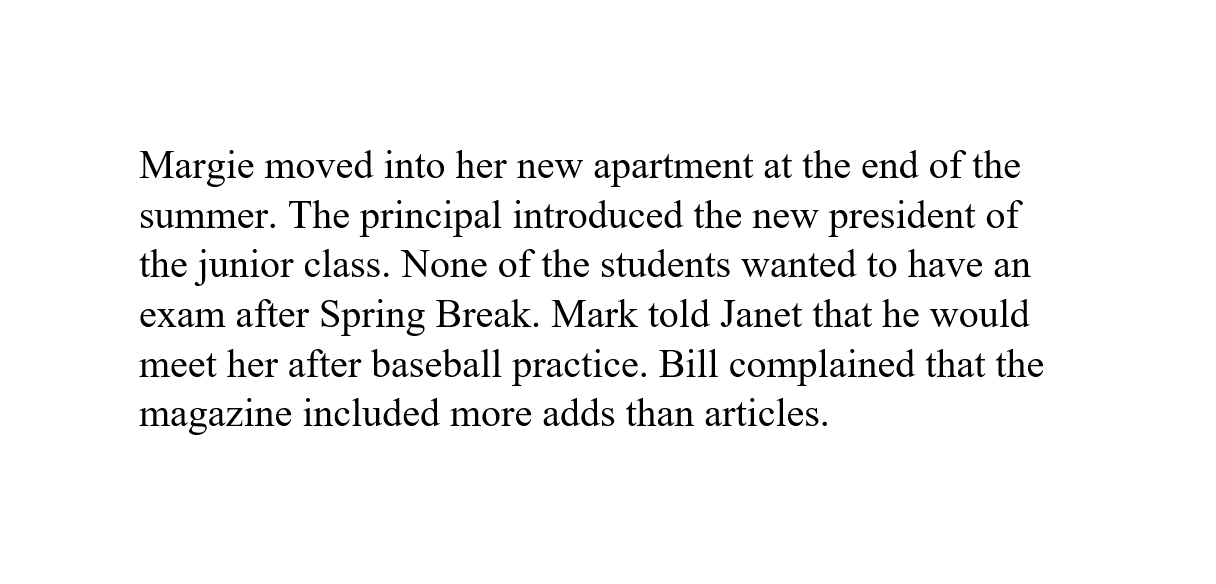

In [2]:
# just showing you the image of the text we will be using to generate fixations over

from IPython.display import Image

img = Image(filename='synthetic_text.png')
img

In [3]:
# yup, this is the same library we used last semester.  We call that foreshadowing :)

import emip_toolkit as EMTK

In [8]:
# generate areas of interest around each word, we will see a visualization of this in a second

image_path = "./"
image = "synthetic_text.png"
aoi = EMTK.find_aoi(image, image_path, level="line")
aoi.head()

,kind,name,x,y,width,height,image
0,line,line 1,137.5,147,886,44,synthetic_text.png
1,line,line 2,138.5,197,888,44,synthetic_text.png
2,line,line 3,137.5,246,897,44,synthetic_text.png
3,line,line 4,137.5,296,896,44,synthetic_text.png
4,line,line 5,137.5,346,909,44,synthetic_text.png


In [7]:
# we add the actual word associated with each area of interest (AOI)

file_path = "./"

aois_with_tokens = EMTK.add_tokens_to_AOIs(file_path, image.split(".")[0]+".txt", aoi)
aois_with_tokens.head()

,kind,name,x,y,width,height,image,token
0,sub-line,line 1 part 1,137.5,147,119,44,synthetic_text.png,Margie
1,sub-line,line 1 part 2,262.5,147,114,44,synthetic_text.png,moved
2,sub-line,line 1 part 3,382.5,147,65,44,synthetic_text.png,into
3,sub-line,line 1 part 4,453.5,147,57,44,synthetic_text.png,her
4,sub-line,line 1 part 5,514.5,147,72,44,synthetic_text.png,new


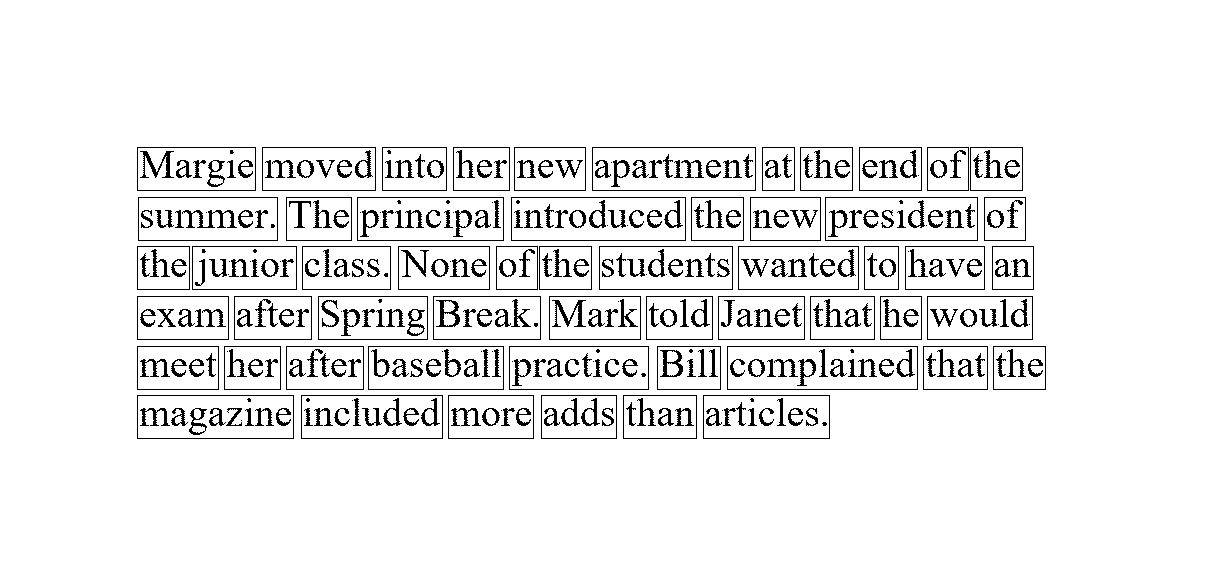

In [8]:
# finally, a visualization of the areas of interest (AOIs) around words!

EMTK.draw_aoi(aoi, image, image_path)

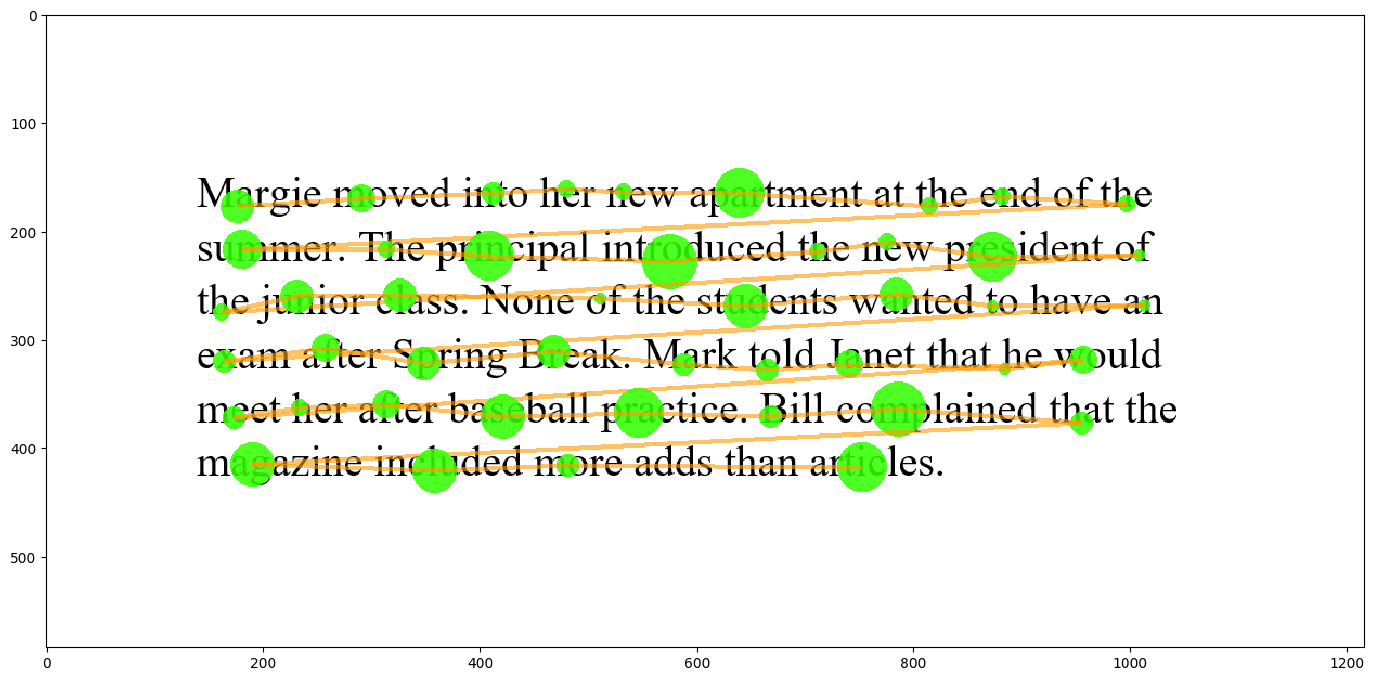

In [9]:
# this is the file you will work on a lot this project

import correction

# generating a synthetic trial
synth_fixations = correction.generate_fixations_left_skip_regression(aois_with_tokens)


# drawing the synthetic data!
correction.draw_fixation('synthetic_text.png', synth_fixations)

# Generating a synthetic dataset with 100 readers:

Look at that, we did something cool!  Now that we know how to generate a single snythetic trial, let's generate 100 and store them in a text file called "synthetic_dataset_with_time.txt" in json format.  I will guide you through the steps using the comments!

In [10]:
data = {}

# loop 100 times maintaining a variable called index
idx = 0
for i in range(100):
    # generate a synthetic trial using similar code to the one above
    synth_fixations = correction.generate_fixations_left_skip_regression(aois_with_tokens)
    name = "robot" + str(idx)
    data[name] = synth_fixations
    idx += 1
    
    # store the trial in the dictionary called "data" where the key is "robot" + str(index)
    


In [11]:
# check that the data looks correct

data["robot1"]



[[185.16666666666666, 162.0, 300],
 [307.5, 169.0, 250],
 [401.1666666666667, 168.0, 200],
 [542.5, 174.0, 150],
 [646.1666666666666, 161.0, 450],
 [776.5, 175.0, 100],
 [932.5, 169.0, 100],
 [984.1666666666666, 171.0, 150],
 [184.16666666666666, 218.0, 350],
 [306.5, 211.0, 150],
 [412.5, 223.0, 450],
 [574.8333333333334, 217.0, 500],
 [701.1666666666666, 228.0, 150],
 [779.1666666666666, 215.0, 150],
 [882.5, 210.0, 450],
 [1003.5, 224.0, 100],
 [156.16666666666666, 272.0, 150],
 [221.5, 268.0, 300],
 [322.1666666666667, 274.0, 300],
 [434.1666666666667, 277.0, 200],
 [517.5, 274.0, 100],
 [635.1666666666666, 265.0, 400],
 [774.8333333333334, 265.0, 300],
 [874.1666666666666, 273.0, 100],
 [940.1666666666666, 258.0, 200],
 [170.16666666666666, 323.0, 200],
 [257.5, 318.0, 250],
 [357.1666666666667, 308.0, 300],
 [462.5, 323.0, 300],
 [678.8333333333334, 316.0, 200],
 [752.5, 327.0, 250],
 [959.8333333333334, 323.0, 250],
 [164.83333333333334, 362.0, 200],
 [304.5, 372.0, 250],
 [414.

In [16]:
# convert data into json format, then store it in a text file called "synthetic_dataset_with_time.txt"
json_object = json.dumps(data) 
with open("synthetic_dataset_with_time.txt", "w") as file:
    file.write(json_object)


That should be it, don't overthink it!  You did great by the way, I can see you, its one of my supernatural abilities.